In [1]:
# Imports all packages necessary or useful

import math
import statistics
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

In [2]:
# Imports our csv file

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D207 - Exploratory Data Analysis\medical_clean.csv")

In [3]:
# Profiles our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Details our 'ReAdmis' variable

df['ReAdmis'].info(), df['ReAdmis'].describe(), df['ReAdmis'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


(None,
 count     10000
 unique        2
 top          No
 freq       6331
 Name: ReAdmis, dtype: object,
 No     6331
 Yes    3669
 Name: ReAdmis, dtype: int64)

In [6]:
# Details our 'BackPain' variable

df['BackPain'].info(), df['BackPain'].describe(), df['BackPain'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: BackPain
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


(None,
 count     10000
 unique        2
 top          No
 freq       5886
 Name: BackPain, dtype: object,
 No     5886
 Yes    4114
 Name: BackPain, dtype: int64)

In [7]:
# Creates a contingency table for our 'Readmis' and 'BackPain' variables

chi2test = pd.crosstab([df.ReAdmis], [df.BackPain]), 
print(chi2test)

(BackPain    No   Yes
ReAdmis             
No        3758  2573
Yes       2128  1541,)


In [8]:
# Chi-squared test for independence:
# Calculates our chi-squared value, p value, degrees of freedom (N observations - 1), and expected outcome

chi2, p, dof, expected = chi2_contingency(chi2test)

In [9]:
# Prints our chi statistic, p value, degrees of freedom, and table of expected values

print('Results:\n', (chi2, p, dof, expected))


Results:
 (1.7166153073233095, 0.1901293128457823, 1, array([[[3726.4266, 2604.5734],
        [2159.5734, 1509.4266]]]))


In [10]:
# Assumes a p value of 0.05 and helps determines what we will do with our hypotheses

alpha = 0.05
if p < alpha:
    print("There is a significant difference between the variables, and we fail to reject the null hypothesis.") 
else:
    print("There is no significant difference between the variables, and we accept the null hypothesis.") 

There is no significant difference between the variables, and we accept the null hypothesis.


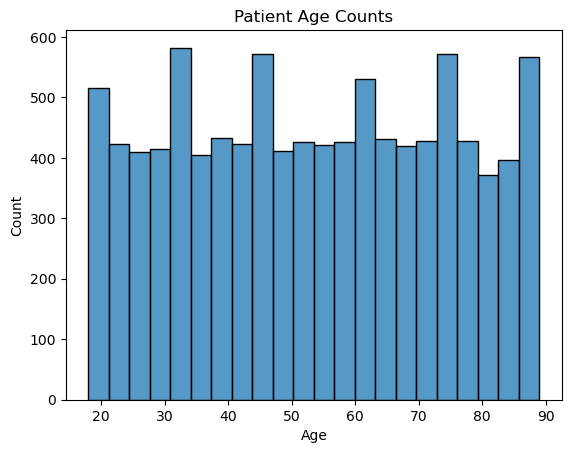

In [62]:
# Displays a histogram for our 'Age' variable
# Distribution appears roughly uniform

sns.histplot(data=df['Age']).set(title='Patient Age Counts')
plt.show()

In [12]:
# Statistically describes our 'Age' variable

df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

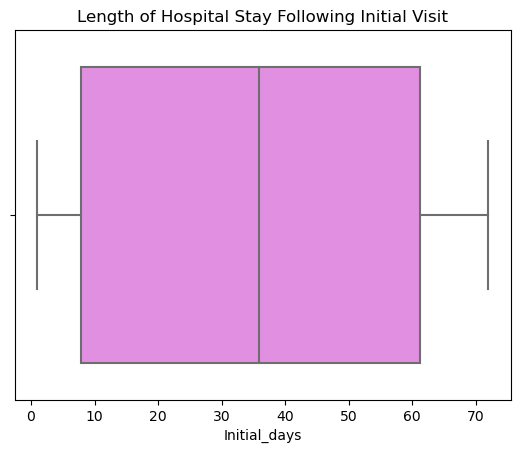

In [60]:
# Displays a histogram for our 'Initial_days' variable
# Distribution is roughly symmetrical

sns.boxplot(x=df['Initial_days'], color="violet").set(title='Length of Hospital Stay Following Initial Visit')
plt.show()

In [14]:
# Statistically describes our 'Initial_days' variable

df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

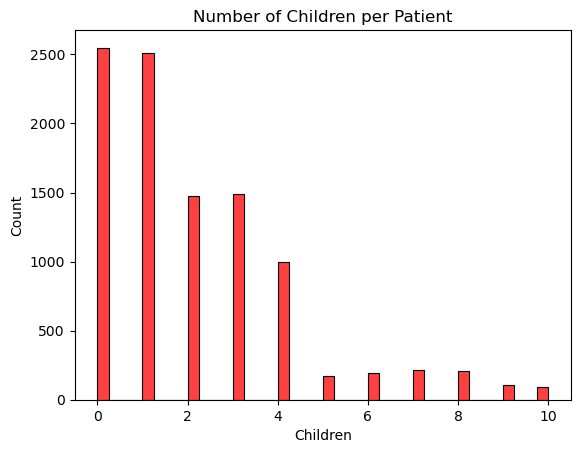

In [58]:
# Displays a histogram for our 'Children' variable
# Distribution is skewed right

sns.histplot(data=df['Children'], binwidth=.25, color="red").set(title='Number of Children per Patient')
plt.show()

In [16]:
# Statistically describes our 'Children' variable

df['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [17]:
# Views value counts for the 'Complication Risk' variable

df['Complication_risk'].value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [18]:
# Assigns components of the pie chart

risk = df['Complication_risk'].value_counts()
cats = ['Medium', 'High', 'Low']

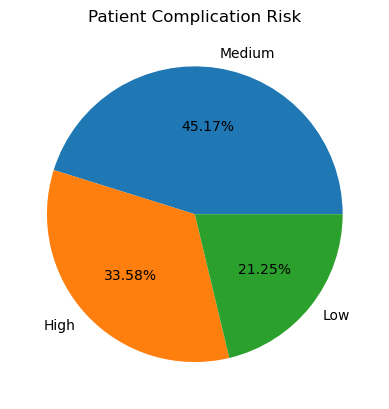

In [52]:
# Completes the pie chart
# Distrbution appears to fall mostly into the "Medium" category, followed by "High" and "Low" risk respectively

plt.title("Patient Complication Risk")
plt.pie(risk, labels=cats, autopct="%.2F%%")
plt.show()

In [20]:
# Describes our 'Complication_risk' variable

df['Complication_risk'].describe(), df['Complication_risk'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Complication_risk
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


(count      10000
 unique         3
 top       Medium
 freq        4517
 Name: Complication_risk, dtype: object,
 None)

In [21]:
# Assistance in code for creating the pie chart was found at https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

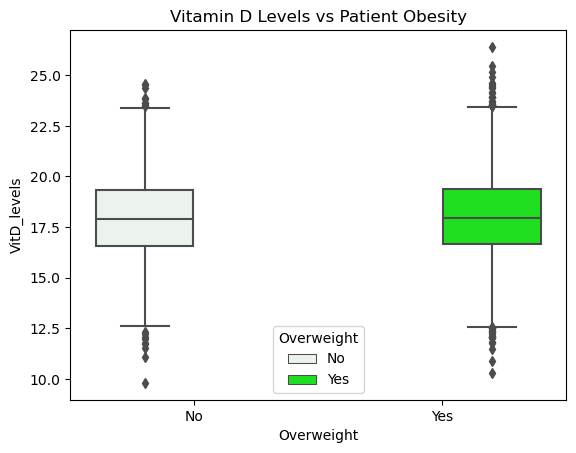

In [54]:
# Creates a bivariate boxplot comparing 'VitD_levels' and 'Overweight'

sns.boxplot(data=df,
            x="Overweight", y="VitD_levels", hue="Overweight",
            color="lime").set(title='Vitamin D Levels vs Patient Obesity')
plt.show()

In [23]:
# Describes the comparison of the 'VitD_levels' vs 'Overweight' variables
# Our boxplots appear symmetrical, though each with many outliers, most densely present for overweight patients with high vitamin D levels

df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

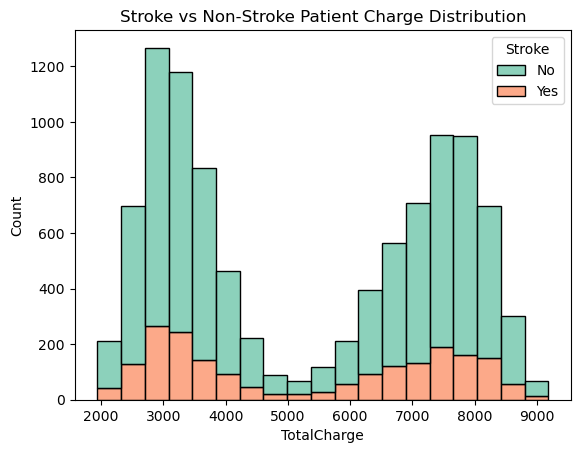

In [56]:
# Creates a stacked bar chart comparing 'TotalCharge' and 'Stroke'

sns.histplot(data=df, x="TotalCharge", hue="Stroke", multiple="stack", palette="Set2").set(title='Stroke vs Non-Stroke Patient Charge Distribution')
plt.show()

In [25]:
# Describes the comparison of total charges to stroke vs non-stroke patients
# Distribution is bimodal with the lowest charge appearing at about $1938, highest at about $9180, with few patients being charged around the $5000 range
# Patients with a stroke history account for a relatively small portion of each bin

df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64